In [40]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Ready data

In [41]:
from os import listdir              # Used for directory operations
from PIL import Image as PImage     # PIL used for image operations
import os

### Load the dataset

In [42]:
def loadImages(path):
    # return array of images, their filenames, and labels
    subfolders = [f.path for f in os.scandir(path) if f.is_dir()]
    loadedImages = []   # Store the loaded images
    filenames = []      # Store the filenames
    labels = []         # Store the labels
    paths = []

    for folder in subfolders:
        imagesList = listdir(folder)
        label = os.path.basename(folder)    # The label is the name of folder

        for image in imagesList:
            image_path = os.path.join(folder, image)  # Full path to the image
            img = PImage.open(image_path)
            img = img.resize((224, 224))              # Resize the image
            loadedImages.append(np.array(img))        # Convert image to a numpy array
            filenames.append(image)                   # Store the filename
            labels.append(label)                      # Store the label
            paths.append(image_path)                  # Store the path

    return np.array(loadedImages), filenames, np.array(labels), paths

# Paths to the dataset
train_path = r"C:/mvtec_anomaly_detection/tile/train"
test_path = r"C:/mvtec_anomaly_detection/tile/test"
ground_truth_path = r"C:/mvtec_anomaly_detection/tile/ground_truth"

# Load the data
train_imgs, train_filenames, train_labels, train_paths = loadImages(train_path)
test_imgs, test_filenames, test_labels, test_paths = loadImages(test_path)
ground_truth_imgs, ground_truth_filenames, ground_truth_labels, ground_truth_paths = loadImages(ground_truth_path)

### Getting images and their labels
Uses `matplotlib` to display the first image from the training set
<br><br>
`train_paths` : Contains path to the training images that is already loaded in the `loadImages` function
<br><br>
`train_label` : Contains the labels of your training images, which is also already loaded

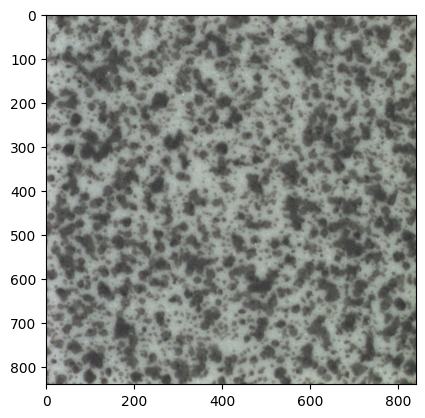

Label:  good


In [43]:
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the first image from your training set
first_image_path = train_paths[0]
img = mpimg.imread(first_image_path)
imgplot = plt.imshow(img)
plt.show()

# Display the label of first image
print("Label: ", train_labels[0])

Print the filenames

In [44]:
# Print the filenames of your images
print(train_filenames)

['000.png', '001.png', '002.png', '003.png', '004.png', '005.png', '006.png', '007.png', '008.png', '009.png', '010.png', '011.png', '012.png', '013.png', '014.png', '015.png', '016.png', '017.png', '018.png', '019.png', '020.png', '021.png', '022.png', '023.png', '024.png', '025.png', '026.png', '027.png', '028.png', '029.png', '030.png', '031.png', '032.png', '033.png', '034.png', '035.png', '036.png', '037.png', '038.png', '039.png', '040.png', '041.png', '042.png', '043.png', '044.png', '045.png', '046.png', '047.png', '048.png', '049.png', '050.png', '051.png', '052.png', '053.png', '054.png', '055.png', '056.png', '057.png', '058.png', '059.png', '060.png', '061.png', '062.png', '063.png', '064.png', '065.png', '066.png', '067.png', '068.png', '069.png', '070.png', '071.png', '072.png', '073.png', '074.png', '075.png', '076.png', '077.png', '078.png', '079.png', '080.png', '081.png', '082.png', '083.png', '084.png', '085.png', '086.png', '087.png', '088.png', '089.png', '090.png'

Check if the filenames of all images have been acquired

In [45]:
# Function that counts all files in all subdirectories of a given path
def count_files_in_subfolders(path):
    subfolders = [f.path for f in os.scandir(path) if f.is_dir()]
    count = 0

    for folder in subfolders:
        count += len(os.listdir(folder))
    return count

In [46]:
# Check for train_path
if count_files_in_subfolders(train_path) == len(train_filenames):
    print("Train filenames match actual amount of files.")

else:
    print("Train filenames do not match actual amount of files, check the target directory.")

# Check for test_path
if count_files_in_subfolders(test_path) == len(test_filenames):
    print("Test filenames match actual amount of files.")

else:
    print("Test filenames do not match actual amount of files, check the target directory.")

# Check for ground_truth_path
if count_files_in_subfolders(ground_truth_path) == len(ground_truth_filenames):
    print("Ground truth filenames match actual amount of files.")

else:
    print("Ground truth filenames do not match actual amount of files, check the target directory.")

Train filenames match actual amount of files.
Test filenames match actual amount of files.
Ground truth filenames match actual amount of files.


### Convert Labels to Numpy Array
Converting from strings to numerical format<br>
`LabelEncoder` will fit on all unique labels
<br><br>
`le.fit(all_labels)` -- Learns the mapping from label names to integer 
<br>
`le.transform()` -- Applies this mapping to all of the labels [converting labels to integer]
<br><br>


In [47]:

from sklearn.preprocessing import LabelEncoder

# Concatenate all labels
all_labels = np.concatenate([train_labels, test_labels, ground_truth_labels])

# Initialize LabelEncoder
le = LabelEncoder()

# Fit the encoder on all files
le.fit(all_labels)

# Transform labels to integers
train_labels_en = np.where(train_labels == 'good', 0, 1)    # 0 for "good", 1 for any defect
test_labels_en = np.where(test_labels == 'good', 0, 1)

### Encoding Test Labels

In [56]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.losses import BinaryCrossentropy

# Simplified Label Encoder for Test Labels
def encode_test_labels(test_labels):
    encoded_labels = []
    for label in test_labels:
        if label == 'good':
            encoded_labels.append(0)
        else:
            encoded_labels.append(1)
    return np.array(encoded_labels)

## Check for Missing Data : Labels or Images
Check by the length of labels and images to see whether there is any missing data
<br>
If the number of filenames matches with the labels, then there is no missing data. If it doesn't match, then there is a missing data

In [50]:
# Check if the number filenames matches the number of labels for each set
# For training
if len(train_filenames) == len(train_labels):
    print("No missing data in training set")
else:
    print("There is missing data in training set!")

# For test
if len(test_filenames) == len(test_labels):
    print("No missing data in testing set")
else:
    print("There is missing data in testingd set!")

No missing data in training set
No missing data in testing set


### Converting label to boolean
`LabelBinarizer`: Used to convert the categorical labels into binary format. <br>
Each label is transformed into an array where only one element is `1` (indicates presence of a defect type) and the rest are `0` 

In [51]:
from sklearn.preprocessing import LabelBinarizer

# Define list of labels (type of defects)
defect_types = ['crack', 'glue_strip', 'good', 'gray_stroke', 'oil', 'rough'] 

# Initialize the LabelBinarizer
lb = LabelBinarizer()

# Fit the LabelBinarizer on the defect types
lb.fit(defect_types)

# Transform labels into one-hot encoded format
test_labels_en = lb.transform(test_labels)
ground_truth_labels_en = lb.transform(ground_truth_labels)

### Split dataset

In [52]:
from sklearn.model_selection import train_test_split

# Load the training images
train_images, train_filenames, train_labels, train_paths = loadImages(train_path)

# Load the testing images
test_images, test_filenames, test_labels, test_paths = loadImages(test_path)

# Load the ground truth images
ground_truth_images, ground_truth_filenames, ground_truth_labels, ground_truth_paths = loadImages(ground_truth_path)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

### Mini Experiment
Early experiment on the first 100 images

In [53]:
# Set number of images for the experiment
NUM_IMAGES = 100

# Define X and y
X = train_images
y = train_labels

# Split into training and validation using NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

print(len(X_train), len(y_train), len(X_val), len(y_val))

80 80 20 20


## Preprocessing Images

### Turn filepath into Tensor of type String
Storing its content in a tensor is usually used to read the raw contents of a file, which can be decoded into the appropriate format (image or text)what shou

### Turn image into a Numerical Tensor 
Will have values 0-255 for RGB _for each pixel_ 
<br>
`tf.image.decode_jpeg` : Decodes a JPEG-encoded image to a tensor

### Normalization
Convert these numbers that are 0-255 for each RGB into 0-1 for each RGB for optimization<br>
`tf.image.convert_image_dtype` : Normalizes the pixel value in the image.<br>
It converts the image to a a specified data type, scaling the values appropriately before returning them <br>
By using `tf.float32`, the function scales the values from the range [0, 255] to [0, 1]

### Building the function

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import glob

# Define the image size
IMG_SIZE = 224

# The function takes an image file path and turns it into a tensor
def preprocess_image(image_path, label, batch_size=32, target_size=IMG_SIZE):
    # Load and preprocess the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (target_size, target_size))  # Resize to target size
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Use the refactored preprocessing function (optional)
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_data_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='mode',  # Maintain for compatibility with the model
        shuffle=False  # Maintain order for anomaly classification
    )

    predicted_probs = model.predict(test_generator)
    potential_anomalies = test_generator.filenames[predicted_probs[:, 0] > anomaly_threshold]

    # Optionally extract features from potential anomalies using the model (assuming output from pre-trained layers)
    anomaly_features = None
    if extract_features:
        # Extract features using the model (implementation specific to your model architecture)
        # Placeholder for feature extraction logid
        anomaly_features = ...

    return potential_anomalies, anomaly_features

## Turn Data into Batches

In [66]:
# Function to return a tuple (image, label)
def get_image_label(image_path, label):
    # Load the image from file path
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)

    # Preprocess the image
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Access the batch size from the dataset
    batch_size = tf.shape(image)[0
    ]
    # Pass the batch size to preprocess_image
    image, label = preprocess_image(image, label, batch_size)   # Ensure preprocess_image is adjusted to accept batch_size
    
    # Assign binary label (0: normal, 1: anomaly)
    if label == "good":
        label = 0
    else:
        label = 1
    return image, label

train_data = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_data = train_data.map(lambda x, y: preprocess_image(data_dir=x, test_data_path=train_paths, batch_size=32, target_size=IMG_SIZE))
train_data = train_data.batch(BATCH_SIZE)

TypeError: in user code:

    File "C:\Users\sofea\AppData\Local\Temp\ipykernel_13380\2956747200.py", line 24, in None  *
        lambda x, y: preprocess_image(data_dir=x, test_data_path=train_paths, batch_size=32, target_size=IMG_SIZE)

    TypeError: outer_factory.<locals>.inner_factory.<locals>.tf__preprocess_image() got an unexpected keyword argument 'data_dir'


In [ ]:
print("Number of training images:", len(X_train))

Number of training images: 80


### Create batches function

In [ ]:
def create_batches(X, y, data_type="Training"):
    print(f"Creating {data_type} Data Batches...")
    data_whole = tf.data.Dataset.from_tensor_slices((X, y))
    data_batch = data_whole.shuffle(buffer_size=len(X)).map(preprocess_image).batch(BATCH_SIZE)
    return data_batch

# Create training data batches
train_data = create_batches(X_train, y_train, data_type="Training")

# Create validation data batches
val_data = create_batches(X_val , y_val, data_type="Validation")

# Create test data batches
test_data = create_batches(test_paths, test_labels_en, data_type="Testing")


Creating Training Data Batches...
Creating Validation Data Batches...
Creating Testing Data Batches...


AttributeError: in user code:

    File "C:\Users\sofea\AppData\Local\Temp\ipykernel_13380\3264428563.py", line 11, in preprocess_image  *
        image = tf.image.convert_image_dtype(image, tf.float32)

    AttributeError: image dtype must be either floating point or integer


## Visualize Data Batches

In [ ]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
    """
    Displays 25 images from a data batch
    """
    # Setup the figure
    plt.figure(figsize=(10, 10))
    # Loop through 25 (for displaying 25 images)
    for i in range(min(25, len(images))):   # Adjust range here
        # Create subplots (5 rows, 5 columns)
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        # Display an image
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])

    # Turn gird lines off
    plt.show()

### Unbatch the data to visualize it

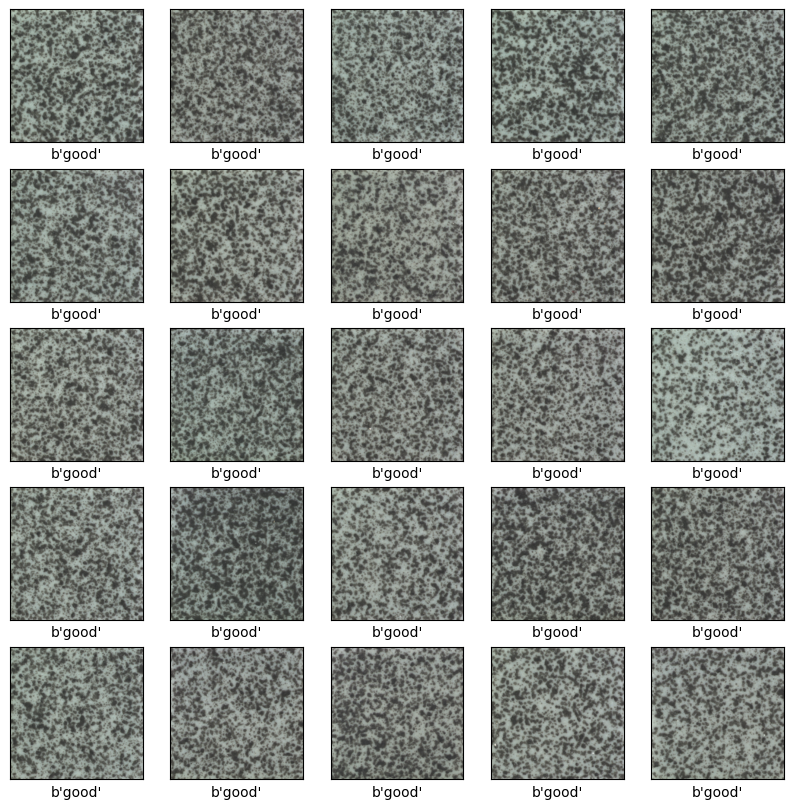

In [ ]:
# Training Data
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

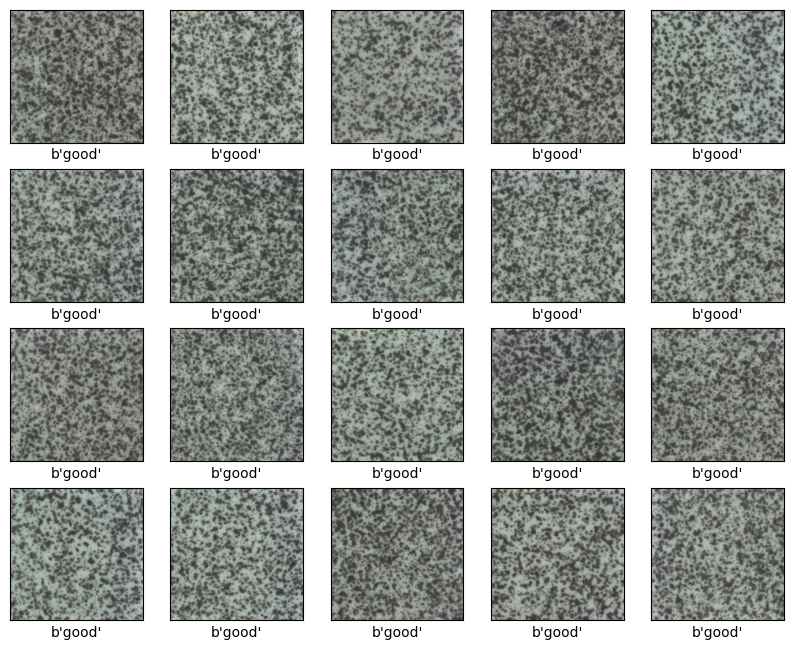

In [ ]:
# Validation Data
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Build a model

In [ ]:
import tensorflow_hub as hub

# Shape of our images
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]     # Batch, height, width, color channels

# SHape of our labels
OUTPUT_SHAPE = len(all_labels)

# Setup a model url
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape=1, model_url=MODEL_URL):
    print("Building a Model with the url: ", MODEL_URL)

    # Instantiate the KerasLayer once
    keras_layer = hub.KerasLayer(MODEL_URL, trainable=False)

    # Setup the Keras layers: Instantiating the model
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape[1:]),   # Use InputLayer to spercify the input shape
        tf.keras.layers.Lambda(lambda x: keras_layer(x)),
        tf.keras.layers.Dense(units=output_shape, activation="sigmoid")
    ])

    # Compiling the model
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    
    return model

# Encode test labels to binary format
test_labels_en = encode_test_labels(test_labels)

model = create_model()
model.summary()


Building a Model with the url:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


C:\Users\sofea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_2 (Lambda)               │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 431)            │       431,862 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 431,862 (1.65 MB)

 Trainable params: 431,862 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

## Creating Callbacks

### Tensorboard Callback

In [ ]:
# Load Tensorboard NB extension:
%load_ext tensorboard

Create the call back function

In [ ]:
import datetime

# Create a function to build a Tensorboard callback
def create_tensorboard_callback():
    # Create a log directory for storing Tensorboard logs
    logdir = os.path.join("./logs", 
                          datetime.datetime.now().strftime("%d%m%Y-%H%M%S"))  # The logs will get tracked whenever run an experiment
    return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback
Training on a subset

In [ ]:
NUM_EPOCHS = 15
# Number of chances our model have to improve

## Create Function To Train Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Build a function to train and return a trained model
def train_model():
    """ 
    Trains a given model and return the trained version of it
    """                    

    # Create model
    model = create_model()

    # Create new TensorBoard session everytime train a model
    tensorboard = create_tensorboard_callback()
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Adjust patience as needed

    # Fit the model
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1,    # Test the patterns found on validation set everytime isliye 1
              callbacks=[tensorboard, early_stopping])

    # Return the fitted model
    return model

model = train_model()

Building a Model with the url:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


C:\Users\sofea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


NameError: name 'early_stopping' is not defined

## Overfitting
Checking the tensorboard LOGS

In [ ]:
%tensorboard --logdir=.logs

## Prediction on Validation Data

In [ ]:
predictions = model.predict(test_data, verbose=1)
predictions.shape